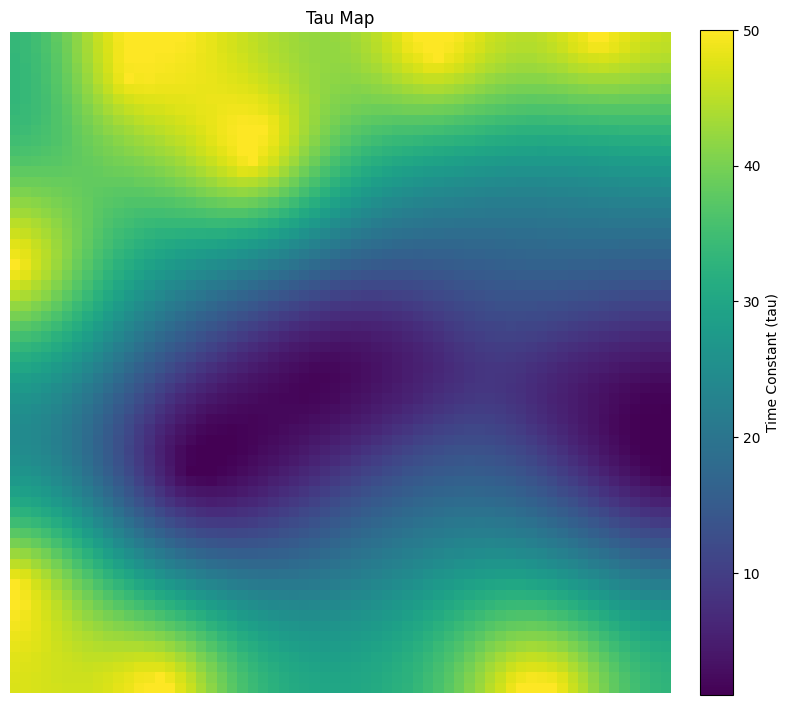

In [3]:
#################### V2 TAU LOSS

import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from matplotlib.colors import hsv_to_rgb
import torch.nn.functional as F
from einops import rearrange

# Add parent directory to path
directory_path = os.path.abspath('../')
if directory_path not in sys.path:
    sys.path.append(directory_path)

from analyze import create_tau_map_figure
from tau_grid_network import TauGridNetwork

model = TauGridNetwork(
            Np=512,
            Ng=4096,
            weight_decay=1e-4,
            activation='relu',
            tau_min=1,
            tau_max=50,
            tau_init='random',
            learnable_tau=True,
            n_modules=4,
        )

checkpoint = torch.load('../checkpoints/tau_01_11_26_0006/model_step_100000.pth', map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])

fig = create_tau_map_figure(model)
plt.show()

Trajectory Generator initialized:
Mean speed: 1.024 m/s
Mean ego_v (displacement/step): 0.0205 m
Expected velocity input magnitude: ~0.0205


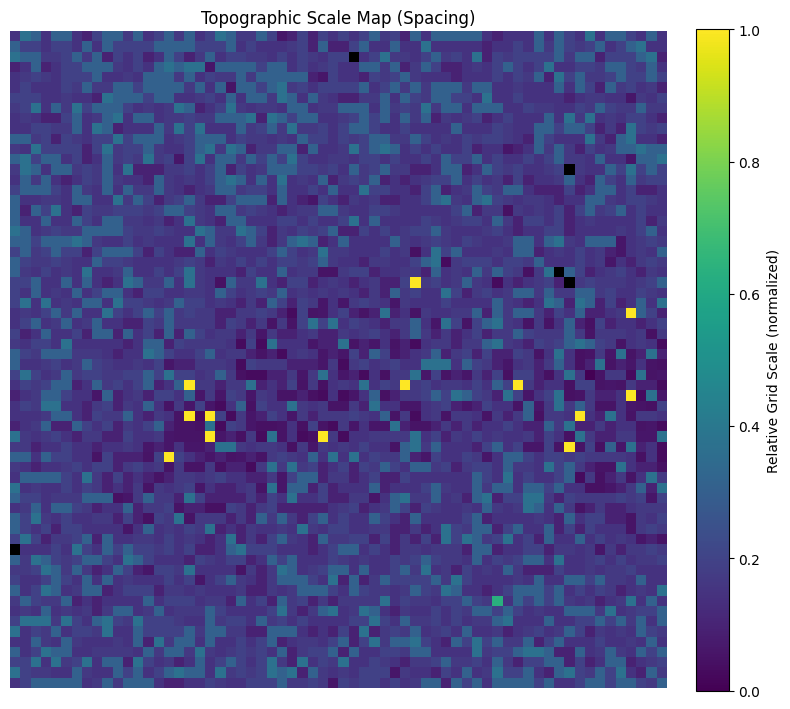

In [4]:
from matplotlib import cm
import matplotlib.colors as mcolors

from analyze import compute_grid_scores_from_model, create_topographic_scale_map_figure
from datagen import GridCellDataGenerator


data_gen = GridCellDataGenerator(
    n_place_cells=512,
    box_size=2.2,
    dt=0.02,
    place_cell_width=0.12,
    surround_scale=2,
    surround_amplitude=0.5,
    DoG=True,
    device='mps'
)

model.to('mps')

grid_scores, ratemaps = compute_grid_scores_from_model(
    model, data_gen, n_batches=50, batch_size=200, seq_length=20, res=32
)

scale_map_fig = create_topographic_scale_map_figure(ratemaps, grid_scores, mask_threshold=0.0)

plt.show()

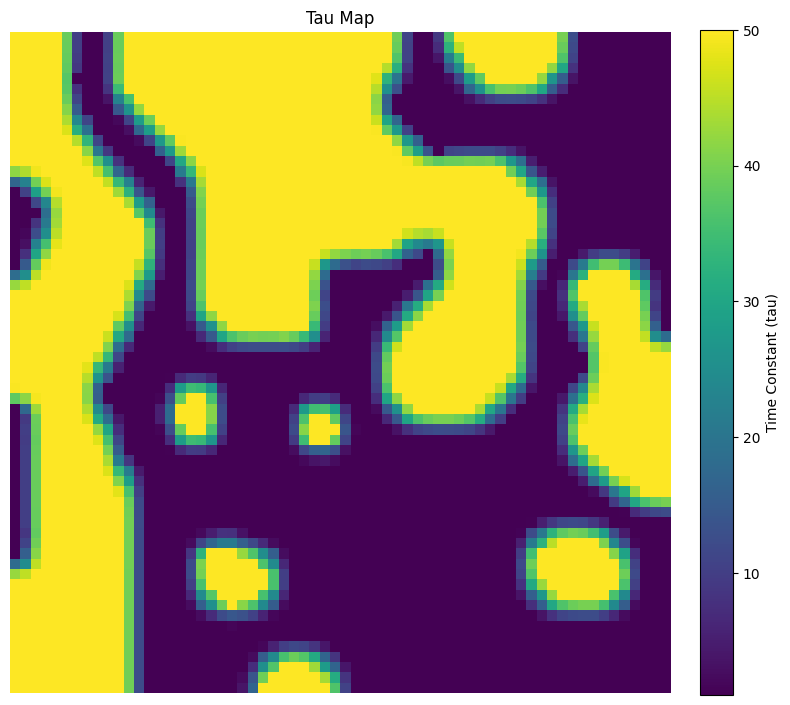

In [5]:
#################### V1 TAU LOSS

import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from matplotlib.colors import hsv_to_rgb
import torch.nn.functional as F
from einops import rearrange

# Add parent directory to path
directory_path = os.path.abspath('../')
if directory_path not in sys.path:
    sys.path.append(directory_path)

from analyze import create_tau_map_figure
from tau_grid_network import TauGridNetwork

model = TauGridNetwork(
            Np=512,
            Ng=4096,
            weight_decay=1e-4,
            activation='relu',
            tau_min=1,
            tau_max=50,
            tau_init='random',
            learnable_tau=True,
            n_modules=4,
        )

checkpoint = torch.load('../checkpoints/tau_01_10_26_1553/model_step_100000.pth', map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])

fig = create_tau_map_figure(model)
plt.show()

Trajectory Generator initialized:
Mean speed: 1.024 m/s
Mean ego_v (displacement/step): 0.0205 m
Expected velocity input magnitude: ~0.0205


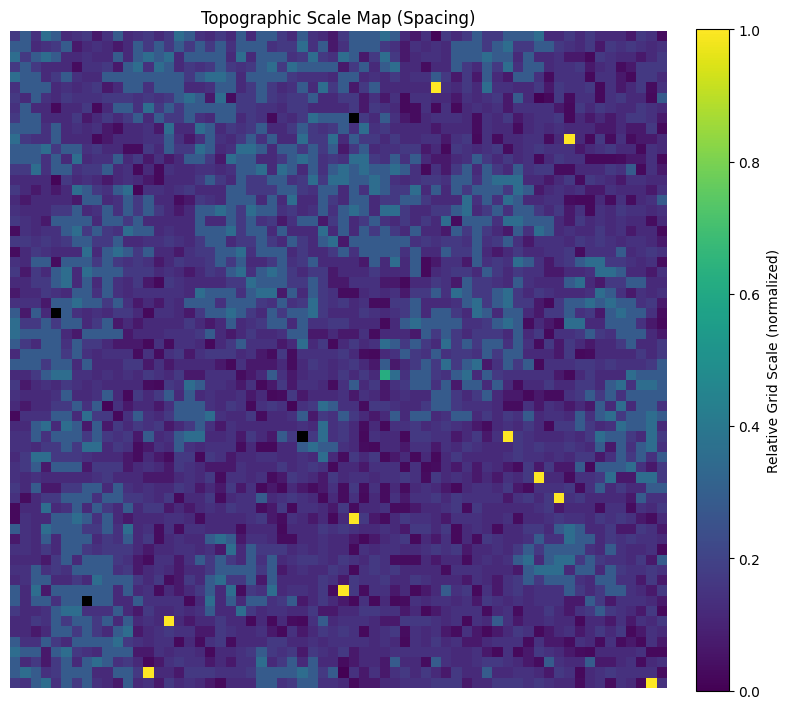

In [6]:
from matplotlib import cm
import matplotlib.colors as mcolors

from analyze import compute_grid_scores_from_model
from datagen import GridCellDataGenerator


data_gen = GridCellDataGenerator(
    n_place_cells=512,
    box_size=2.2,
    dt=0.02,
    place_cell_width=0.12,
    surround_scale=2,
    surround_amplitude=0.5,
    DoG=True,
    device='mps'
)

model.to('mps')

grid_scores, ratemaps = compute_grid_scores_from_model(
    model, data_gen, n_batches=50, batch_size=200, seq_length=20, res=32
)

scale_map_fig = create_topographic_scale_map_figure(ratemaps, grid_scores, mask_threshold=0.0)

plt.show()